# Given dataset - Commentary.txt, calculate following:
1. List balls(delivery) when “Four” runs were scored and extract batsman and bowler for the same
2. List balls(delivery) when “Yorker” was bowled and extract batsman and bowler for the same

## Output Format:
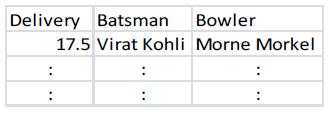

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
file = open('Commentary.txt', 'r') 
lines = [x.strip() for x in file.readlines()]

In [3]:
lines

['2',
 '20.3',
 'Imran Tahir to Virat Kohli',
 'INDIA WIN BY 9 WICKETS (with 177 balls left)! Their second best win in terms of balls remaining against a Test playing nation. A quicker full ball on middle, Kohli tries to power it over the leg side but it takes the inner half of his bat and screams past the diving backward square leg fielder. They take two runs and that will be it. The players shake hands in the middle and head back to the pavilion, again.',
 '0',
 '20.2',
 'Imran Tahir to Virat Kohli',
 'A low full toss on middle, pushed back to the bowler.',
 '0',
 '20.1',
 'Imran Tahir to Virat Kohli',
 'Too full and on middle, drilled to mid on.',
 '',
 'Firdose Moonda',
 '@FirdoseM',
 'Well-fed South Africa have taken the field, in front of almost no crowd, and prepare to go down 2-nil in the series. At least everyone has had lunch. #SAvIND #cricket',
 '',
 '6:02 PM - Feb 4, 2018',
 '341',
 '86 people are talking about this',
 'Twitter Ads info and privacy',
 'Kohli on 44... Can he

In [4]:
regex_pattern = re.compile("^[0-9]*[.][0-9]$")

In [5]:
match_details_list = list()

for line_num, line in enumerate(lines):
    if regex_pattern.match(line):
        delivery = str(line).strip()
        print("Delivery: {}".format(delivery))
        runs_scored = str(lines[line_num-1]).strip()
        print("Runs Scored: {}".format(runs_scored))
        batsman = str(lines[line_num+1]).split('to')[1].strip()
        print("Batsman: {}".format(batsman))
        bowler = str(lines[line_num+1]).split('to')[0].strip()
        print("Bowler: {}".format(bowler))
        commentary = str(lines[line_num+2]).strip()
        print("Commentary: {}".format(commentary))
        is_yorker = "yes" if "yorker" in commentary.lower() else "no"
        print("Is Yorker?: {}".format(is_yorker))
        delivery_details_dict = {"delivery": delivery, "runs_scored": runs_scored, "batsman": batsman, "bowler": bowler, "commentary": commentary, "is_yorker": is_yorker}
        match_details_list.append(delivery_details_dict)

Delivery: 20.3
Runs Scored: 2
Batsman: Virat Kohli
Bowler: Imran Tahir
Commentary: INDIA WIN BY 9 WICKETS (with 177 balls left)! Their second best win in terms of balls remaining against a Test playing nation. A quicker full ball on middle, Kohli tries to power it over the leg side but it takes the inner half of his bat and screams past the diving backward square leg fielder. They take two runs and that will be it. The players shake hands in the middle and head back to the pavilion, again.
Is Yorker?: no
Delivery: 20.2
Runs Scored: 0
Batsman: Virat Kohli
Bowler: Imran Tahir
Commentary: A low full toss on middle, pushed back to the bowler.
Is Yorker?: no
Delivery: 20.1
Runs Scored: 0
Batsman: Virat Kohli
Bowler: Imran Tahir
Commentary: Too full and on middle, drilled to mid on.
Is Yorker?: no
Delivery: 19.6
Runs Scored: 0
Batsman: Shikhar Dhawan
Bowler: Tabraiz Shamsi
Commentary: Fuller and around leg, Dhawan sweeps but finds short fine leg. MAIDEN!
Is Yorker?: no
Delivery: 19.5
Runs Sc

In [6]:
match_details_df = pd.DataFrame(match_details_list)  

In [7]:
match_details_df.head(10)

,batsman,bowler,commentary,delivery,is_yorker,runs_scored
0,Virat Kohli,Imran Tahir,INDIA WIN BY 9 WICKETS (with 177 balls left)! ...,20.3,no,2
1,Virat Kohli,Imran Tahir,"A low full toss on middle, pushed back to the ...",20.2,no,0
2,Virat Kohli,Imran Tahir,"Too full and on middle, drilled to mid on.",20.1,no,0
3,Shikhar Dhawan,Tabraiz Shamsi,"Fuller and around leg, Dhawan sweeps but finds...",19.6,no,0
4,Shikhar Dhawan,Tabraiz Shamsi,"Loopy full ball outside off, spinning away, Dh...",19.5,no,0
5,Shikhar Dhawan,Tabraiz Shamsi,"Full flighted ball outside off, driven off the...",19.4,no,0
6,Shikhar Dhawan,Tabraiz Shamsi,Leans forward to a full ball and defends it ba...,19.3,no,0
7,Shikhar Dhawan,Tabraiz Shamsi,Defended off the front foot by the batsman pre...,19.2,no,0
8,Shikhar Dhawan,Tabraiz Shamsi,"Floated ball outside off, full in length, Dhaw...",19.1,no,0
9,Virat Kohli,Imran Tahir,"Short and outside off, Kohli goes back and cut...",18.6,no,2


In [8]:
match_details_df.to_excel('match_details.xlsx', index=False)

In [9]:
match_details_df.dtypes

batsman        object
bowler         object
commentary     object
delivery       object
is_yorker      object
runs_scored    object
dtype: object

# Answer to Problem #1
## Assumption: Extras added to the total due to WIDE balls (marked as WD) have not been considered in the runs scored in any particular delivery. 
## Example: for Delivery 2.4 where an extra run was provided due to WIDE ball and boundary (i.e. 4 runs) was scored of the next ball, only 4 runs were associated with Delivery 2.4.

In [10]:
match_details_df.loc[match_details_df.runs_scored == '4', ['delivery', 'batsman', 'bowler']]

,delivery,batsman,bowler
16,17.5,Virat Kohli,Morne Morkel
19,17.2,Shikhar Dhawan,Morne Morkel
35,14.5,Virat Kohli,Imran Tahir
41,13.6,Virat Kohli,Tabraiz Shamsi
46,13.1,Shikhar Dhawan,Tabraiz Shamsi
54,11.5,Shikhar Dhawan,Tabraiz Shamsi
55,11.4,Shikhar Dhawan,Tabraiz Shamsi
60,10.5,Shikhar Dhawan,Imran Tahir
71,8.6,Virat Kohli,Chris Morris
83,6.6,Shikhar Dhawan,Chris Morris


In [11]:
match_details_df.loc[match_details_df.runs_scored == '4', ['delivery', 'batsman', 'bowler']].to_csv('answer1.csv', index=False)

# Answer to Problem #2
## Assumption: Deliveries where the keyword "yorker" was found in the commentary were tagged as a yorker delivery.

In [12]:
match_details_df.loc[match_details_df.is_yorker == 'yes', ['delivery', 'batsman', 'bowler']]

,delivery,batsman,bowler
67,9.4,Virat Kohli,Kagiso Rabada
109,2.5,Shikhar Dhawan,Morne Morkel
124,0.4,Rohit Sharma,Morne Morkel


In [13]:
match_details_df.loc[match_details_df.is_yorker == 'yes', ['delivery', 'batsman', 'bowler']].to_csv('answer2.csv', index=False)